In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.duplicated().sum()

np.int64(24)

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# transforming age from days to year
df['age'] = (df['age']/365).round().astype(int)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


## Handling Outliers

In [10]:
print(df['age'].min())
print(df['age'].max())

30
65


55
250


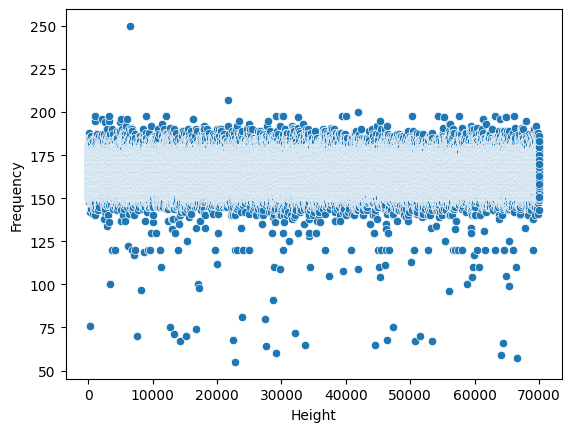

In [11]:
print(df['height'].min())
print(df['height'].max())

sns.scatterplot(df['height'])
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [12]:
print(len(df[df['height'] < 150]))
print(len(df[df['height'] > 200]))

1537
2


In [13]:
len(df[df['height'] < 140])

152

In [14]:
df = df[df['height'] > 140]

In [15]:
len(df[df['height'] < 150])

1337

In [16]:
df.iloc[df['height'] < 150] = 150
len(df[df['height'] < 150])

0

10.0
200.0


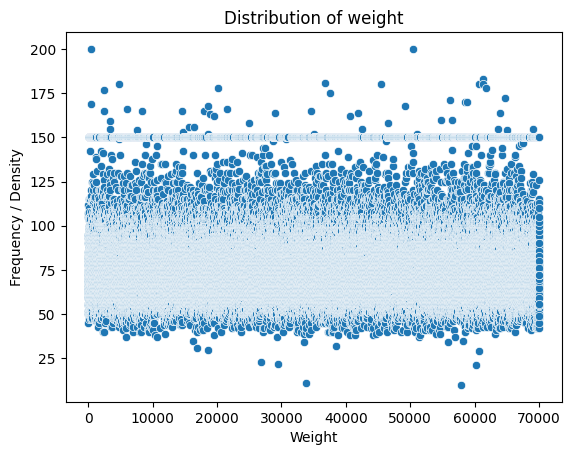

In [17]:
print(df['weight'].min())
print(df['weight'].max())

sns.scatterplot(df['weight'])
plt.title('Distribution of weight')
plt.xlabel('Weight')
plt.ylabel('Frequency / Density')
plt.show()

In [18]:
len(df[df['weight'] <= 40])

59

In [19]:
len(df[df['weight'] <= 30])

7

In [20]:
df = df[df['weight'] >= 30]

In [21]:
df.iloc[df['weight'] < 40] = 40
len(df[df['weight'] < 40])

0

In [22]:
print(df['ap_hi'].min())
print(df['ap_hi'].max())

print(len(df[df['ap_hi'] < 90]))
print(len(df[df['ap_hi'] > 240]))

-150
16020
336
40


In [23]:
opposite = df[df["ap_hi"] < df["ap_lo"]]
print(len(opposite))
opposite.head()

1201


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,48,2,183,98.0,160,1100,1,2,1,0,1,1
241,60,2,157,60.0,160,1000,2,1,0,0,0,1
260,50,1,150,83.0,140,800,1,1,0,0,1,1
329,64,1,176,63.0,160,1000,2,2,0,0,0,1
345,51,1,154,81.0,140,1000,2,1,0,0,1,1


In [24]:
swap = df['ap_hi'] < df['ap_lo']
df.loc[swap, ['ap_hi', 'ap_lo']] = df.loc[swap, ['ap_lo', 'ap_hi']].values

In [25]:
len(df[df["ap_hi"] < df["ap_lo"]])

0

In [26]:
df.shape

(69770, 12)

In [27]:
print(len(df[df['ap_hi'] < 90]))
print(len(df[df['ap_hi'] > 240]))

print(len(df[df['ap_lo'] < 60]))
print(len(df[df['ap_lo'] > 160]))

228
967
371
199


In [28]:
df = df[df["ap_hi"].between(90, 240)]
df = df[df["ap_lo"].between(60, 160)]
df.shape

(68382, 12)

In [29]:
print(df['gender'].unique())
print(df['cholesterol'].unique())
print(df['gluc'].unique())
print(df['smoke'].unique())
print(df['alco'].unique())
print(df['cardio'].unique())

[  2   1 150]
[  1   3   2 150]
[  1   2   3 150]
[  0   1 150]
[  0   1 150]
[  0   1 150]


## Normalizing

In [30]:
# cols_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# scaler = StandardScaler()

# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# df.head()

## Visualization And Removing Non related columns

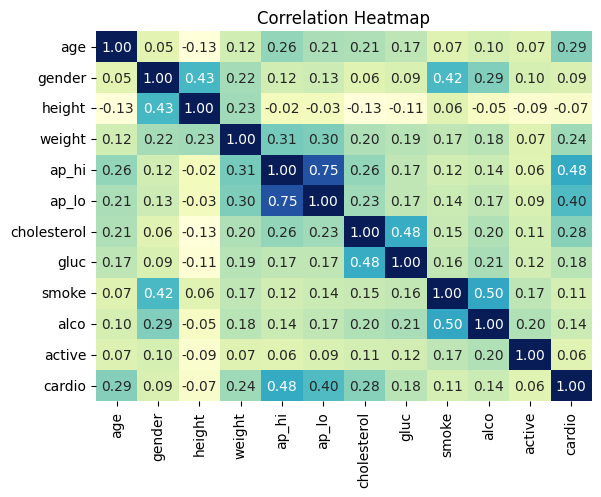

In [31]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f', cmap='YlGnBu',cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df = df.drop(['gender', 'height'], axis=1)
df.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,62.0,110,80,1,1,0,0,1,0
1,55,85.0,140,90,3,1,0,0,1,1
2,52,64.0,130,70,3,1,0,0,0,1
3,48,82.0,150,100,1,1,0,0,1,1
4,48,56.0,100,60,1,1,0,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler

# Use
df.to_csv('cleaned_cardio.csv', index=False)